In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x105db3a90>)

In [4]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn')

/Users/BadWizard/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/style/core.py:197: UserWarning: In /Users/BadWizard/.matplotlib/stylelib/my_custom_style.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


In [5]:
data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


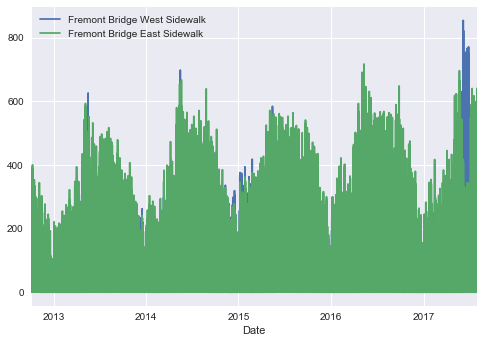

In [6]:
data.plot()

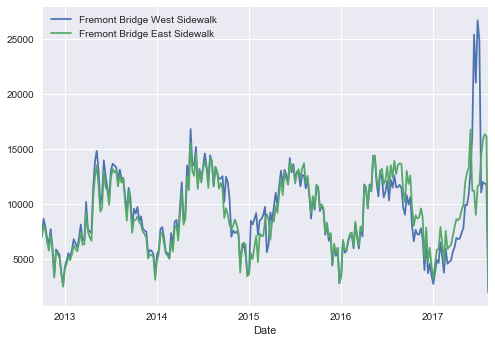

In [7]:
data.resample('W').sum().plot()

/Users/BadWizard/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()


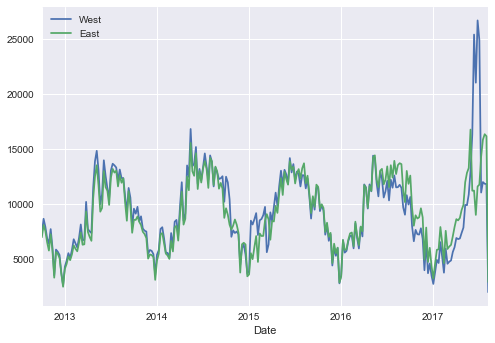

In [8]:
data.columns = ['West', 'East']

data.resample('W', sum).plot()

(0, 1059460.05)

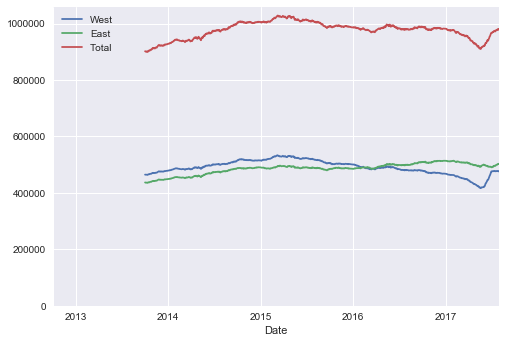

In [9]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

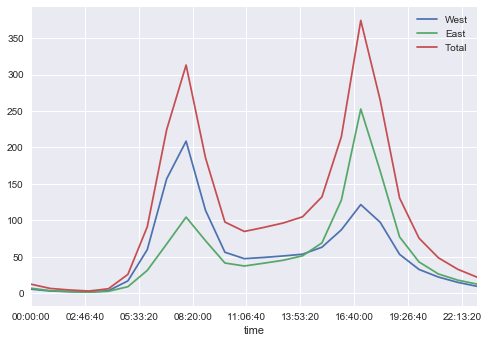

In [10]:
data.groupby(data.index.time).mean().plot()

In [11]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [12]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)

In [13]:
pivoted.iloc[:24, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0
05:00:00,31.0,26.0,25.0,5.0,9.0
06:00:00,155.0,142.0,105.0,27.0,17.0
07:00:00,352.0,319.0,319.0,33.0,26.0
08:00:00,437.0,418.0,370.0,105.0,69.0
09:00:00,276.0,241.0,212.0,114.0,103.0


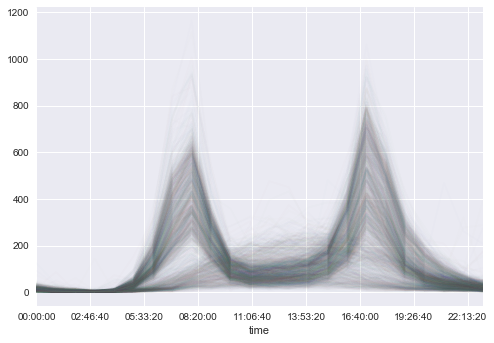

In [14]:
pivoted.plot(legend = False, alpha = 0.01)